# Segunda Entrega
---

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width = 50% high = 50%><center>

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Primera inspección de los datos](#inspeccion)
* [5. Data Cleaning](#cleaning)
    * [5.1. Datos nulos](#nulos)
    * [5.2. Datos duplicados](#duplicados)
* [6. Data Wrangling](#wrangling)
* [7. Popularidad](#popularidad)
    * [7.1. Géneros](#pop_generos)
    * [7.2. Artistas](#pop_artistas)
    * [7.3. Canciones](#pop_canciones)
* [8. Duración](#duracion)
* [9. Bailabilidad](#baile)
* [10. Palabra hablada](#hablada)
* [11. Letras explícitas](#explicito)
* [12. Evolución con el tiempo](#tiempo)
* [13. Insights y recomendaciones](#insights)

## 1. Introducción <a class="anchor" id="intro"></a>
---
La industria de la música no es ajena a la innovación tecnológica: la revolución digital y la masificación del acceso del internet cambiaron las reglas del juego. Los servicios de streamming de música y podcasts hoy son la norma. Spotify, YouTube Music, Tidal y otros, compiten por liderar el mercado en donde implementar soluciones tecnológicas les permite destacarse por sobre las demás. Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.

Se trabajará utilizando dos dataset, uno de ellos contiene una selección de 114 géneros musicales, cada uno con 1.000 piezas músicales de mayor consumo actual, totalizando 114.000 canciones. El segundo dataset está compuesto por las 200 canciones más populares de cada año, entre los años 1980 y 2022, sumando 8600 piezas musicales.

## 2. Contexto <a class="anchor" id="contexto"></a>
---

A los fines de atraer clientes y lograr su permanencia en el mismo, Spotify debe ofrecer una amplia variedad de géneros, artistas y canciones, junto con un sistema sencillo e intuitivo de usar. En este último ítem se encuentra el sistema de recomendación de canciones. Por otro lado, el servicio debe ser atractivo también para los artistas, atrayéndolos para que publiquen sus canciones en la plataforma. Para ello son cruciales los mecanismos que les den visibilidad dentro de la plataforma.

Surge la inquietud de definir un sistema de recomendación que fidelice tanto a los clientes como a los artistas. Para ello se propone un sistema de clasificación y de recomendación que ofrezca canciones que sean del agrado de los clientes y que además, recomiende canciones de artistas nuevos. El objetivo es ampliar el número de artistas que los clientes escuchan, encontrando el balance entre artistas nuevos y artistas ya establecidos. Lo anterior busca dar más visibilidad a los intérpretes a la vez que brinda novedades a los clientes, manteniendo así su atención.

El sistema de clasificación y de recomendación se basará fuertemente en las semejanzas y diferencias estadísticas y las correlaciones entre las variables que componen el dataset. La información disponible se analizará buscando identificar semejanzas y diferencias entre las canciones y géneros musicales, evaluando si estas podrían dar sustento al mencionado sistema de recomendación.

## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos. Estas hipótesis buscan dar lugar a conclusiones que lleven a una mejor comprensión del comportamiento general de los clientes del servicio. Además, estas preguntas pueden dar lugar a un mejor sistema de clasificación y/o recomendación.

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿Todas las piezas musicales poseen voz cantada? ¿O existen piezas en dónde la voz es hablada?
* ¿Qué proporción de las canciones se las puede clasificar como bailables? 
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cúal es la duración promedio de las canciones?
* ¿Las variables que clasifican las canciones varían con los años? ¿Hay alguna tendencia que nos permitar dar alguna idea de las preferencias futuras?

Estas hipótesis no serán respondidas en el orden en el que fueron planteadas sino de manera orgánica a medida que los datos son analizados.

<center><img src = "https://storage.googleapis.com/pr-newsroom-wp/1/2021/09/ehance-video-cover.png" width = 60% high = 60%><center>

## 4. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>
---

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import median
from wordcloud import WordCloud

In [26]:
df = pd.read_csv('Spotify_Track_Dataset.csv')
df_api = pd.read_csv('Spotify_API.csv')

Llamaremos al dataset "df" como el dataset "original", mientras que al dataset "df_api" como el dataset extraído desde la API. 

In [27]:
print(df.shape, df_api.shape)

(114000, 21) (8598, 19)


In [28]:
df.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic


In [29]:
df_api.head(1)

,Unnamed: 0,year,artist,track,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1980,AC/DC,You Shook Me All Night Long,2SiXAy7TuUkycRVbbWDEpo,80,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.39,0.755,127.361,210173,4


Ambos dataset poseen estructura muy similar, compartiendo muchas de las variables. Entre las variables presentes se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. La principal diferencia es que la base de datos extraída desde la API no incluye el género musical al que pertenecen las canciones. A continuación se describen algunas de las variables, principalmente aquellas de significados complejos.

- popularity: Popularidad de la canción, toma valores entre 0 y 100, siendo 100 el más popular. 
- explicit: Informa si la canción posee letras explícitas o no.
- danceability: Describe cuan bailable es una canción. 0 indica poco bailable y 1 indica muy bailable.
- energy: Es una medida de la intensidad. Canciones energéticas se sienten rápidas, de volumen alto y ruidosas.
- loudness: Volumen promedio de la canción en decibelios.
- speechiness: Detecta la presencia de palabra hablada. Mientras más palabra hablada posea, más cerca de 1 estará el valor.
- acousticness: Medida desde 0.0 a 1.0 sobre si la canción es acústica, indicando 1.0 que la canción es acústica.
- instrumentalness: Predice si la canción no contiene voces. Mientras más cerca esté de 1.0, mayor es la posibilidad que la canción no contenga voces.
- liveness: Detecta la presencia de audiencia en las canciones. Altos valores indican alta posibilidad de que el tema se interpretó en vivo.
- valence: Medida desde 0.0 a 1.0 describiendo la positividad musical que la canción porta. Canciones con alta valencia suenan más positivas, mientras la baja valencia indica temas más negativos.

In [30]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [31]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset original está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaeton, etcétera. Además, el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación.

## 5. Data Cleaning <a class="anchor" id="cleaning"></a>
---

El funcionamiento de los algoritmos depende de poseer información libre de valores nulos y repetidos, las siguientes dos subsecciones se focalizan rápidamente en dichos asuntos.

### 5.1. Datos nulos <a class="anchor" id="nulos"></a>

In [32]:
df = df.dropna()

### 5.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [33]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

In [34]:
df = df.drop_duplicates(subset = ['track_id'])

El total de canciones repetidas en el dataset original asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto. Sin embargo, al igual que con los valores tipo NaN, borramos los valores repetidos en el dataset. El dataset extraído desde la API posee intrínsicamente valores duplicados, dado que se creó a partir de las canciones más populares de cada año, es decir, hay canciones que fueron populares durante más de un año.

## 6. Data Wrangling <a class="anchor" id="wrangling"></a>
---

In [35]:
def wrangling(data):
    
    if 'track_id' in data.columns:
        data.drop(['Unnamed: 0', 'track_id'], axis = 1, inplace = True)
        
        # Eliminamos los artistas secundarios
        data[['artists', 'artists_1']] = data['artists'].str.split(';', n = 1, expand = True)
        data.drop('artists_1', axis = 1, inplace = True)
        
    else:
        data.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
        data.rename(columns = {'artist':'artists'}, inplace = True)
        
    # Pasamos de ms a minutos
    data['duration_min'] = (data['duration_ms']/(60 * 1000)).round(2)
    data.drop('duration_ms', axis = 1, inplace = True)

    # Expresamos el volumen en números positivos
    data['loudness_db'] = - data['loudness']
    data.drop('loudness', axis = 1, inplace = True)
    
    # Clasificamos según speechiness
    group_names = ['Music', 'Mixed', 'Spoken']
    data['speechiness'] = pd.cut(data['speechiness'], [0, 0.33, 0.66, 1], labels = group_names, include_lowest = True)
    
    # Clasificamos según danceablility
    group_names = ['No bailable', 'Bailable']
    data['danceable'] = pd.cut(data['danceability'], [0, 0.75, 1], labels = group_names, include_lowest = True)

    return data

In [36]:
df = wrangling(df)
df_api = wrangling(df_api)

Se eliminaron las columnas "Unnamed: 0", "track_id" que sólo indica el número de fila y que identifica la canción en el servicio Spotify, respectivamente. Se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos. En el caso que una canción posea más de un intérprete, la columna "artists" presenta a los artistas separados por punto y coma (;), por ello se separa las artistas y se selecciona sólo el principal. Por otro lado "speechiness" detecta la presencia de palabra hablada. Mientras más palabra hablada posea (talk show, audiobook, poesía), más cerca de 1 estará el valor. Valores entre 0.33 y 0.66 describen piezas musicales con carácter mixto entre música y palabra hablada. Valores por debajo de 0.33 representan música y otros temas con voz cantada. Con tales rangos crearemos una clasificación cualitativa, con la idea de simplificar el análisis. De forma similar, se clasificó las canciones como bailables (danceable) o no, fijanto arbitrariamente como bailables a aquellas canciones con valores de "danceablity" mayores a 0,75.

## 7. Popularidad <a class="anchor" id="popularidad"></a>
---

En esta sección se analizan los géneros, artistas y canciones de mayor popularidad.

### 7.1. Géneros <a class="anchor" id="pop_generos"></a>

In [37]:
print('Hay {} géneros en el dataset.'.format(df['track_genre'].unique().size))

Hay 113 géneros en el dataset.


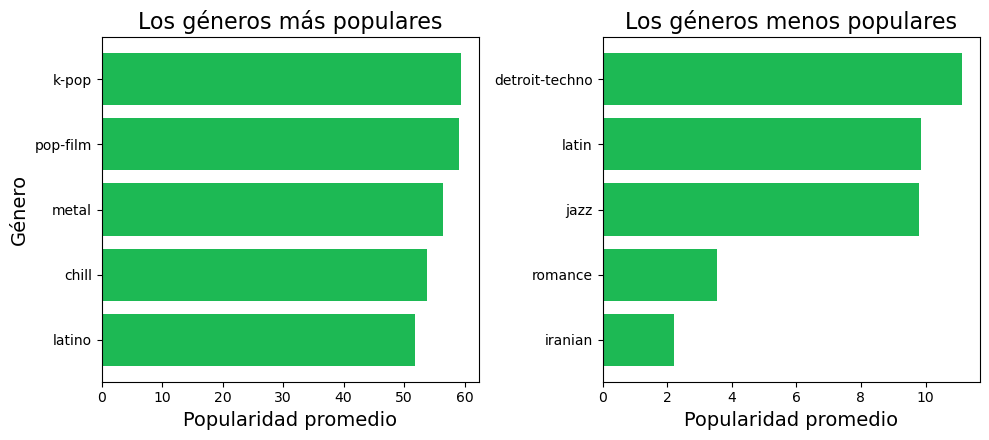

In [38]:
popularity_mean = df['popularity'].groupby(df['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(most_popular_genres.index[::-1], most_popular_genres[::-1], color = '#1DB954')
axs[1].barh(least_popular_genres.index[::-1], least_popular_genres[::-1], color = '#1DB954')

axs[0].set_xlabel('Popularidad promedio', fontsize = 14)
axs[1].set_xlabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Género', fontsize = 14)
axs[1].set_title('Los géneros menos populares', fontsize = 16)
axs[0].set_title('Los géneros más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad genero.jpg', dpi = 300)
plt.show()

Se observa que 113 géneros componen el dataset, presentando géneros tan diversos tales como "k-pop", "detroit-techno" y "chill". Los géneros de mayor popularidad promedio poseen todos más de 50 puntos, presentando diversidad de géneros. Dicha diversidad tambien está presente en los géneros menos populares, poseeyendo valores en torno los 10 puntos de popularidad promedio.

### 7.2. Artistas <a class="anchor" id="pop_artistas"></a>

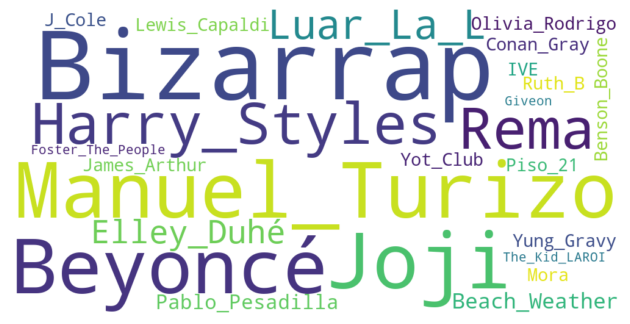

In [39]:
popular_artists = df['popularity'].groupby(df['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(25)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]
string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

El Word Cloud muestra los 25 artistas más populares del dataset original, la mayoría de ellos son artistas vigentes y de gran difusión en la actualidad. Esto ilustra en gran medida los gustos de los oyentes, dando una idea aproximada de los artistas que más seran solicitados al algoritmo de recomendación de canciones. 

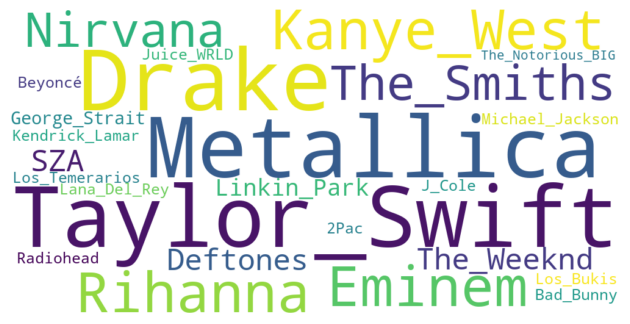

In [40]:
alltime_popular_artists = df_api['artists'].value_counts().head(25)

text = list(alltime_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]

string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas api.jpg', dpi = 300)
plt.show()

Por otro lado, este Word Cloud obtenido a partir del dataset obtenido por medio de la API muestra los 25 artistas más populares entre los años 1980 y 2022. Este muestra artistas de diferentes décadas, tales como Metallica, Nirvana, Michael Jackson y Taylor Swift. Estos artistas son siempre escuchados y de relevancia.

### 7.3. Canciones <a class="anchor" id="pop_canciones"></a>

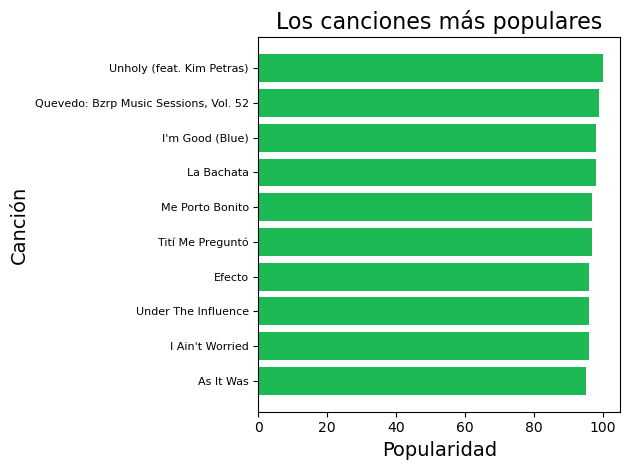

In [41]:
df2 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1], color = '#1DB954')
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.yticks(fontsize = 8)
plt.title('Los canciones más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad canciones.jpg', dpi = 300)
plt.show()

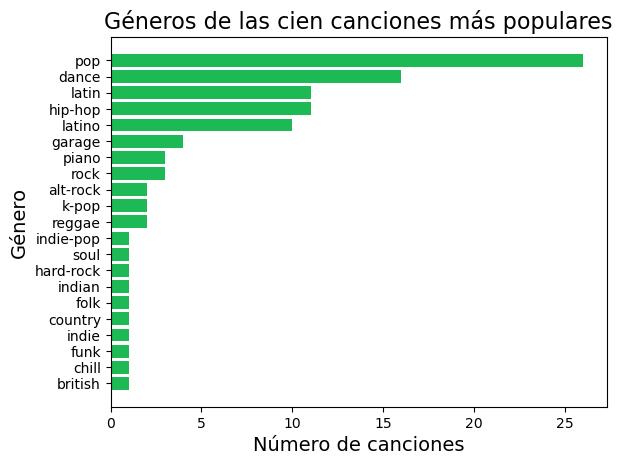

In [42]:
df3 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
# plt.savefig('Popularidad genero 2.jpg', dpi = 300)
plt.show()

Por otro lado, si analizamos las canciones más populares y los géneros de dichas canciones, encontramos que en su mayoría que estas canciones pertenecen a los géneros "pop", "dance", "latin" y "latino". Estas canciones, en general son buscadas por su altos valores de "valence" y "danceability", es decir, son canciones muy bailables y que en general transmiten emociones positivas.  

## 8. Duración <a class="anchor" id="duracion"></a>
---

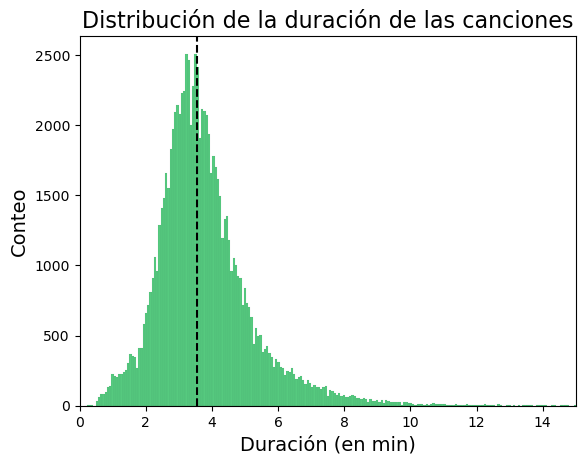

In [43]:
sns.histplot(df['duration_min'], color = '#1DB954')
plt.axvline(median(df['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14) 
plt.ylabel('Conteo', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
# plt.savefig('Duracion.jpg', dpi = 300)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

## 9. Bailabilidad <a class="anchor" id="baile"></a>
---

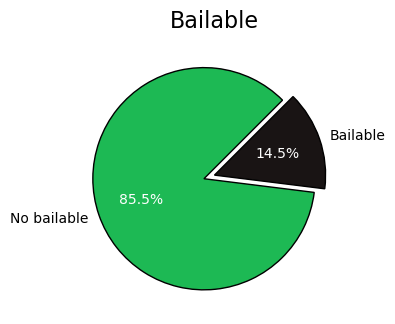

In [44]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('danceable').size(), labels = ('No bailable', 'Bailable'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Bailable', fontsize = 16)
plt.tight_layout()
# plt.savefig('Bailabilidad.jpg', dpi = 300)
plt.show()

Se observa que sólo un 14,5 % de las canciones del dataset original se clasificaron como bailables, sin embargo estas canciones son las más populares. Esto quiere decir, que las canciones más demandas al servicio muy probablemente son las que más se disfrutan bailando, pero que sin embargo estás canciones no contienen a todo el universo de las canciones solicitadas. 

## 10. Palabra hablada (Speechiness) <a class="anchor" id="hablada"></a>
---

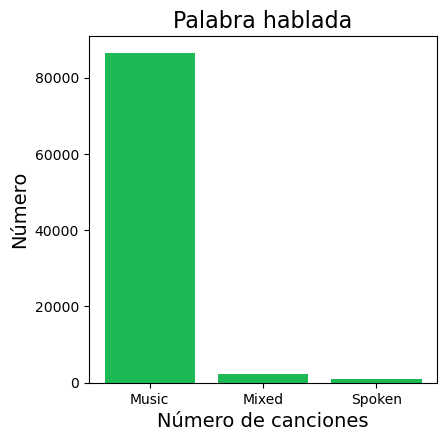

In [45]:
plt.figure(figsize = (4.5, 4.5))
plt.bar(df.groupby('speechiness').size().index, df.groupby('speechiness').size(), color = '#1DB954')    
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Número', fontsize = 14)
plt.title('Palabra hablada', fontsize = 16)
# plt.savefig('Palabra hablada.jpg', dpi = 300)
plt.show()

La gran mayoría de las canciones que componen el dataset original poseen voz cantada, sólo una fracción minoritaria está compuesta por piezas en las que tiene presencia de palabra hablada, es decir, piezas tales como rap, poesía, etc.

## 11. Letras explicítas <a class="anchor" id="explicito"></a>
---

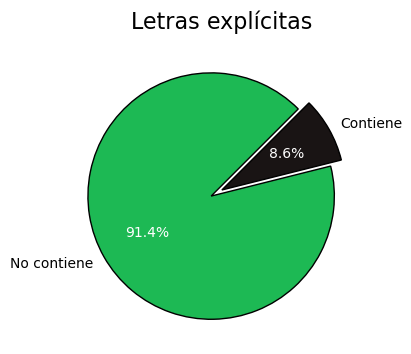

In [46]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
# plt.savefig('Letras explicitas.jpg', dpi = 300)
plt.show()

Se encuentra que el 8.6 % de las canciones poseen letras explíctas. Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

## 12. Evolucion con el tiempo <a class="anchor" id="tiempo"></a>
---

In [47]:
year, danceability, energy, tempo, valence = [], [], [], [], []

for i in range(1980, 2023):
    year.append(i)
    danceability.append(np.median(df_api.loc[df_api['year'] == i]['danceability']))
    energy.append(np.median(df_api.loc[df_api['year'] == i]['energy']))
    tempo.append(np.median(df_api.loc[df_api['year'] == i]['tempo']))
    valence.append(np.median(df_api.loc[df_api['year'] == i]['valence']))

df_api_avg = pd.DataFrame({'year':year, 'danceability':danceability, 'energy':energy, 'tempo':tempo, 'valence':valence})

Se creó un dataset nuevo, el cual está compuesto por las medianas de las variables "danceability", "energy", "tempo" y "valence" de las canciones de cada año del dataset obtenido por la API.

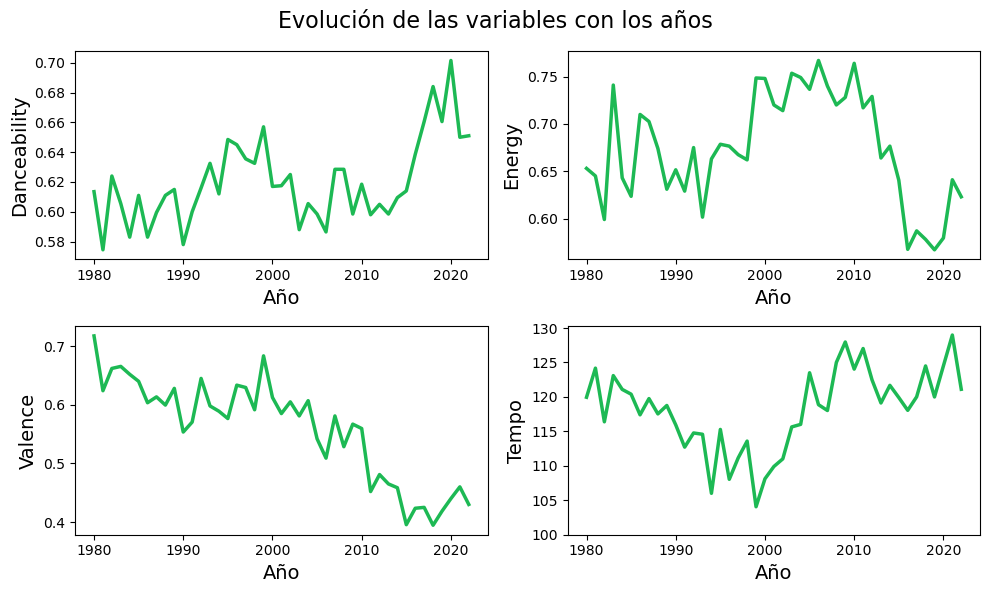

In [48]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

axs[0,0].plot(df_api_avg['year'], df_api_avg['danceability'], c = '#1DB954', lw = 2.5)
axs[0,1].plot(df_api_avg['year'], df_api_avg['energy'], c = '#1DB954', lw = 2.5)
axs[1,0].plot(df_api_avg['year'], df_api_avg['valence'], c = '#1DB954', lw = 2.5)
axs[1,1].plot(df_api_avg['year'], df_api_avg['tempo'], c = '#1DB954', lw = 2.5)

variable = ['Danceability', 'Energy', 'Valence', 'Tempo']

for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Año', fontsize = 14)
    ax.set_ylabel(f'{variable[i]}', fontsize = 14)
    
axs[1,1].set_yticks(np.arange(100, 131, 5))
    
fig.suptitle('Evolución de las variables con los años', fontsize = 16)

plt.tight_layout()
# plt.savefig('Evolucion.jpg', dpi = 300)
plt.show()

Se observa que estas variables tuvieron cambios progresivos con el pasar de los años. En líneas generales, parece huber un cambio en las tendencias de las variables "danceability", "energy" y "valence" en los años 2010. En dicha década las canciones aumentaron las medianas de dichas variables, probablemente debido al éxito relativamente reciente de los géneros de música pop, hip-hop, latino y similares. Por otro lado, la variable "tempo" tuvo un notable aumento en el año 2000 para luego estancarse durante el rango 2005 al 2020. 

## 13. Insights y recomendaciones <a class="anchor" id="insights"></a>
---

En función del analisis exploratorio del dataset se presentan los siguientes insights:

- Las canciones más populares pertenecen, en su gran mayoría, a los géneros pop, hip-hop y latino. En consecuencia, los artistas más populares son los que se dedican a los mencionados géneros. 

- Además de los artistas más populares del momento existen artistas de décadas pasadas que permanecen vigentes y escuchados actualmente.

- Las canciones más elegidas por los usuarios son aquellas que transmiten mayor energía, emociones típicamente calificadas como positivas y voluntad de bailar. Sólo el 15 % de las canciones del dataset original son consideradas bailables.

- Casi con exclusividad las piezas musicales poseen voz cantada, sólo un número menor poseen palabra hablada. 

- Menos del 9 % de las canciones poseen letras explícitas, no aptas para menores.

- Las variables que caracterizan a las canciones evolucionan con el pasar de los años. En la década del 2010 se detectaron cambios de tendencia en estas variables.

Y a su vez, en respuesta a los insights, se plantean las recomendaciones que continúan:

- Para atraer a oyentes jóvenes, entre 18 y 30 años, la plataforma debe poseer un amplio repertorio de canciones bailables, que transmitan emociones positivas y energía. Los géneros pop, hip-hop, latinos, entre otros, gozan de popularidad puesto que cumplen con las características mencionadas.

- Se recomienda explorar la posibilidad de ofrecer un servicio diferenciado para menores de edad. Este rango etario posee preferencias musicales similares a los jóvenes de entre 18 y 30 años. Este servicio diferenciado debe poseer la opción de que los padres puedan filtrar las canciones con letras violentas y/o explícitas.

- Por otro lado, a los fines de convencer y/o retener la audiencia de más edad, el servicio Spotify debe ofrecer canciones de artistas consagrados que permanecen vigentes. Artistas tales como Metallica, Michael Jackson, The Smith, 2Pac, Eminem, etcétera, son de géneros dispares y de diferentes décadas pero que figuran en los tops de popularidad. 

- Géneros musicales que tuvieron su pico de popularidad en décadas pasadas pero que siguen siendo muy escuchados podrían beneficiarse del influjo de artistas nuevos que siguen produciendo música en estos géneros. Spotify podría dar más visibilidad a dichos artistas para ofrecer novedades para atraer a posibles clientes que gusten de dicha música.